# Imports

In [ ]:
import pandas as pd
import numpy as np
from numpy import sqrt

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [2]:
data_boston = pd.read_csv("content/boston.csv", header=None)
print(data_boston.shape)
data_boston.head()

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
data_gauss = pd.read_csv("content/gauss.csv")
print(data_gauss.shape)
data_gauss.head()

(250, 2)


,x,y
0,1.0,97.58776
1,2.0,97.76344
2,3.0,96.56705
3,4.0,92.52037
4,5.0,91.15097


In [251]:
class OrdinaryLeastSquares:
    def __init__(self):
        self.w = []
        self.mse = None
        self.target_max = None
        self.target_min = None
        self.unormalized_rmse = None

    def fit(self, x, y, target_max = None, target_min = None):
        x = x.copy()
        x.insert(0, "x0", 1)
        x = x.values
        y = y.values

        squares_inv = np.linalg.pinv(x.T @ x)
        self.w = squares_inv @ x.T @ y
        train_prediction = x @ self.w
        self.mse = np.mean((y - train_prediction) ** 2)

        if target_max and target_min:
            train_prediction_un = train_prediction * (target_max - target_min) + target_min
            y_un = y * (target_max - target_min) + target_min
            self.unormalized_rmse = sqrt(np.mean((y_un - train_prediction_un) ** 2))
        return self.w

    def predict(self, x):
        x = x.copy()
        x.insert(0, "x0", 1)
        x = x.values

        return x @ self.w

# questão 1

In [269]:
boston_train, boston_test = train_test_split(
    data_boston, test_size=0.2, random_state=101
)

In [270]:
boston_max = boston_train.max()
boston_min = boston_train.min()

target_max = boston_max.iloc[-1]
target_min = boston_min.iloc[-1]

In [271]:
boston_train_norm = (boston_train - boston_min) / (boston_max - boston_min)
boston_test_norm = (boston_test - boston_min) / (boston_max - boston_min)

In [272]:
X_train = boston_train_norm.iloc[:, 0:-1]
y_train = boston_train_norm.iloc[:, -1]

X_test = boston_test_norm.iloc[:, 0:-1]
y_test = boston_test_norm.iloc[:, -1]

In [273]:
polynom_train = []
polynom_test = []

for i in range(11):
    polynom_train.append(X_train ** (i + 1))
    polynom_test.append(X_test ** (i + 1))

In [274]:
OLS = OrdinaryLeastSquares()

In [275]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()
rmse_train = []
rmse_test = []

for train, test in zip(polynom_train, polynom_test):
    train_data = pd.concat([train_data, train], axis=1)
    test_data = pd.concat([test_data, test], axis=1)
    # print(train_data.shape, test_data.shape)
    # print(train_data.columns)
    OLS.fit(train_data, y_train, target_max=target_max, target_min=target_min)
    rmse_train.append(OLS.unormalized_rmse)
    y_pred_norm = OLS.predict(test_data)
    y_pred = y_pred_norm * (target_max - target_min) + target_min
    rmse_test.append(sqrt(np.mean((y_test - y_pred) ** 2)))

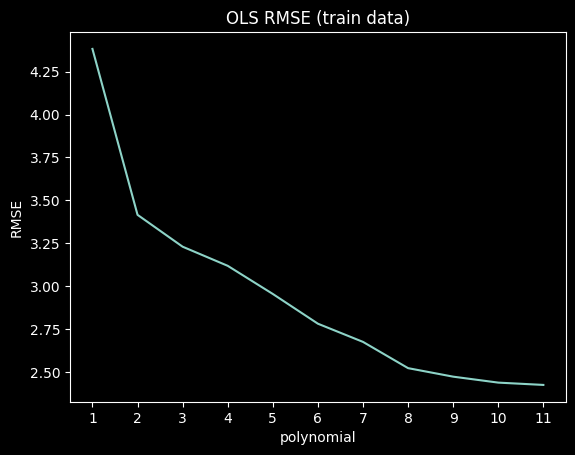

In [276]:
x_axis = range(1, len(rmse_train) + 1)
plt.plot(x_axis, rmse_train)
plt.xlabel('polynomial')
plt.xticks(x_axis)
plt.ylabel('RMSE')
plt.title("OLS RMSE (train data)")
plt.show()

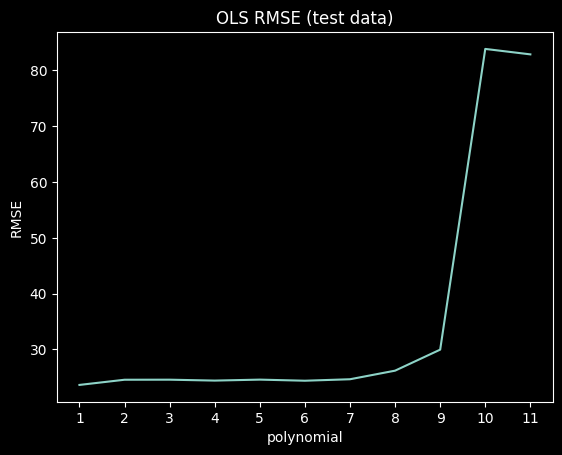

In [277]:
x_axis = range(1, len(rmse_test) + 1)
plt.plot(x_axis, rmse_test)
plt.xlabel('polynomial')
plt.xticks(x_axis)
plt.ylabel('RMSE')
plt.title("OLS RMSE (test data)")
plt.show()

In [261]:
OLS.predict(test_data)

array([0.88856454, 0.56474796, 0.14260921, 0.23889823, 0.46750337,
       0.61140567])

# test iris

In [ ]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [ ]:
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris["target"] = iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
